<a href="https://colab.research.google.com/github/Darshini-A/Data-Science-2/blob/main/Prac_1_DSII_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Q:1 find out age of abalone from physical measurements
# Regression models

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/abalone_original.csv')
df.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


In [19]:
df.shape

(4177, 9)

In [20]:
df=pd.read_csv('abalone_original.csv')
df.head(10)

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
5,I,85,60,19,70.3,28.2,15.5,24.0,8
6,F,106,83,30,155.5,47.4,28.3,66.0,20
7,F,109,85,25,153.6,58.8,29.9,52.0,16
8,M,95,74,25,101.9,43.3,22.5,33.0,9
9,F,110,88,30,178.9,62.9,30.2,64.0,19


In [21]:
df['age'] = df.rings + 1.5
df.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings,age
0,M,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5


In [22]:
df_info = pd.DataFrame(df.dtypes, columns=['Data Type'])
df_info['Null Count'] = df.isnull().sum()
df_info

,Data Type,Null Count
sex,object,0
length,int64,0
diameter,int64,0
height,int64,0
whole-weight,float64,0
shucked-weight,float64,0
viscera-weight,float64,0
shell-weight,float64,0
rings,int64,0
age,float64,0


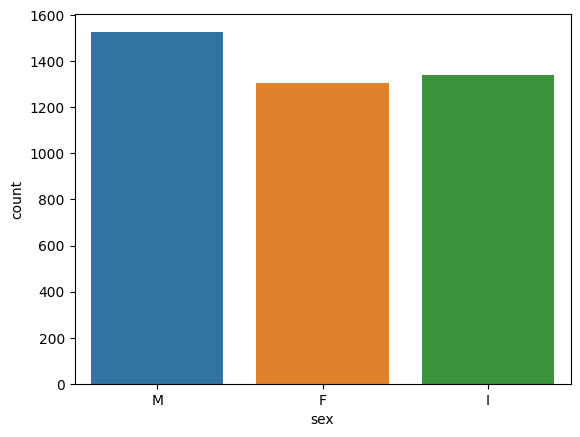

In [23]:
sns.countplot(x='sex', data=df)
plt.show()

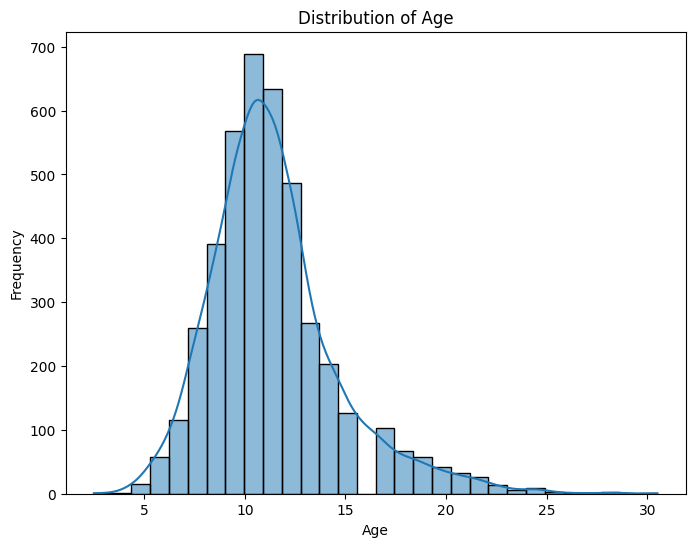

In [25]:
# Visualize the distribution of the target variable ('age')
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [27]:
final_df = pd.concat([pd.get_dummies(df.sex, drop_first=True), df.drop('sex',1)], axis=1)
final_df.head()

,I,M,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings,age
0,0,1,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,0,1,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,0,0,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,0,1,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,1,0,66,51,16,41.0,17.9,7.9,11.0,7,8.5


In [28]:
X, y = final_df.drop('rings', 1).values, final_df.rings.values
X.shape, y.shape

((4177, 10), (4177,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [32]:
# Calculate Mean Squared Error (MSE) for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Mean Squared Error (MSE) - Training Set:')
print(mse_train)
print(f'Mean Squared Error (MSE) - Testing Set:')
print(mse_test)

Mean Squared Error (MSE) - Training Set:
2.534755771557578e-29
Mean Squared Error (MSE) - Testing Set:
2.747425133542462e-29


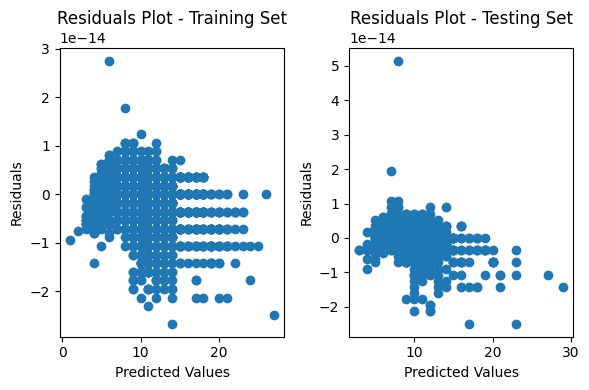

In [33]:
# Calculate residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train)
plt.title('Residuals Plot - Training Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test)
plt.title('Residuals Plot - Testing Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()